In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

Y_columns = ['koi_disposition', 'koi_pdisposition', 'koi_score']
misc_columns = ['kepid', 'kepoi_name', 'kepler_name', 'koi_tce_delivname']

train_X = train_df.drop(columns=Y_columns + misc_columns)
train_Y = train_df[Y_columns + misc_columns]

test_X = test_df.drop(columns=Y_columns + misc_columns)
test_Y = test_df[Y_columns + misc_columns]

### K Means CLustering

In [3]:
cont_names = [
  'koi_period',
  'koi_time0bk',
  'koi_impact',
  'koi_duration',
  'koi_depth',
  'koi_prad',
  'koi_teq',
  'koi_insol',
  'koi_model_snr',
  'koi_tce_plnt_num',
  'koi_steff',
  'koi_slogg',
  'koi_srad',
  'ra',
  'dec',
  'koi_kepmag',
]

In [4]:
data = train_X[cont_names]

pca = PCA(n_components=3)
data_trans = pca.fit_transform(data)

In [5]:
c = KMeans(n_clusters=1, random_state=2022)
labels = c.fit_predict(data_trans)

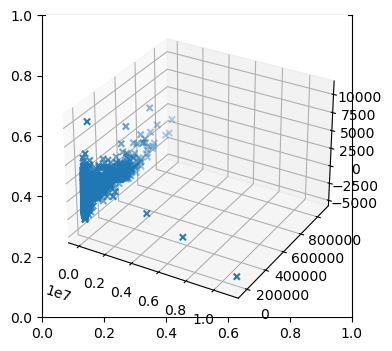

In [6]:
fig, ax = plt.subplots(1, figsize=(4, 4), dpi=100)
ax = fig.add_subplot(projection='3d')
for i in range(c.n_clusters):
    ax.scatter(data_trans[labels==i,0], data_trans[labels==i,1],data_trans[labels==i,2], marker='x')

### Conclusion

After using PCA on continuous variable non error columns to cut down on the number of dimensions it seems like there is only one cluster. This makes sense because classifying exoplanets is inherently a very difficult problem. Maybe if there was a way to view the data in a higher dimension we could see some sort of cluster, but as of now that is not possible. 